In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime
from scipy.stats import iqr

from sklearn.linear_model import LinearRegression

In [2]:
def open_and_split(fileName, starting_index):
    dummy = open(fileName, "r")
    length = len(dummy.readlines()) - 1
    dummy.close()
    
    file = open(fileName, "r")
    data = [next(file) for _ in range(length)]
    file.close()

    #divide linens and split the data
    data = [data[i].replace("\n", "") for i in range(len(data))]
    data = [data[i].split() for i in range(len(data))]
    
    #delete first row
    print(f"deleted rows: {data[0]}")
    data = data[starting_index:]
    print(type(data))
    
    return data

#function that filter year
def filter_year(DataFrame, year):
    condition = DataFrame["Year"] == year
    return DataFrame.where(condition).dropna().reset_index().drop("index", axis = 1).drop("Year", axis=1)

#convert Day-Hour to composite
def D_to_C(DataFrame):
    composite = [int(DataFrame["Day"][i]) * 24 + int(DataFrame["Hour"][i]) for i in range(DataFrame.shape[0])]
    
    new = DataFrame.copy()
    new.insert(0, "Time", composite)
    new = new.drop(["Day", "Hour"], axis = 1)
    
    return new

#DLL file with specific columns with conversion of hr:mm to hr
def dll_convert(DataFrame):
    converted = [[int(DataFrame[i][1]), int(DataFrame[i][2][:2]), float(DataFrame[i][6])] for i in range(len(DataFrame))]
    return converted

def standard_units(DataFrame):
    mean_E1 = DataFrame["IMF E"].mean()
    std_E1 = np.std(DataFrame["IMF E"])
    mean_DLL = DataFrame["DLL"].mean()
    std_DLL = np.std(DataFrame["DLL"])
    
    std1 = [((DataFrame["IMF E"][i] - mean_E1) / std_E1) for i in range(len(DataFrame))]
    std2 = [((DataFrame["DLL"][i] - mean_DLL) / std_DLL) for i in range(len(DataFrame))]
    
    return pd.DataFrame({"IMF E STD": std1, "DLL STD": std2})

def correlation_coefficient(dataframe):
    return np.mean(dataframe["IMF E STD"] * dataframe["DLL STD"])

def do_one(power):
    dll_row = open_and_split("DLL_zenodo_1995_T1h.txt", 21)
    dll_row_selected = dll_convert(dll_row)

    dll = pd.DataFrame(dll_row_selected, columns=["Day", "Hour", "DLL"])
    dll = D_to_C(dll)

    grouped_dll = dll.groupby("Time").mean()
    
    IMF_E_row = open_and_split("1995 IMF E.lst", 0)
    
    selected_data_row = [[int(IMF_E_row[i][1]), int(IMF_E_row[i][2]), (float(IMF_E_row[i][4]) ** power)] for i in range(len(IMF_E_row))]
    
    selected_data = []
    for i in range(len(IMF_E_row)):
        if selected_data_row[i][2] != 9999.99 ** power:
            selected_data.append(selected_data_row[i])
            
    IMF_E_data = pd.DataFrame(selected_data, columns = ["Day", "Hour", "IMF E"])
    
    IMF_E = D_to_C(IMF_E_data).groupby("Time").mean()
    
    combined = pd.merge(left=IMF_E, right=grouped_dll, left_on="Time", right_on="Time").reset_index()
    
    std = standard_units(combined)
    
    val = correlation_coefficient(std)
    
    print(val)
    return val

In [3]:
dll_data_all = open_and_split("DLL_zenodo_1995_T1h.txt", 21)
dll_data_converted = dll_convert(dll_data_all)
dll_data = dll_data_converted
dll_data

deleted rows: ['****************************************************************************************']
<class 'list'>


[[1, 4, -9.11],
 [1, 4, -9.12],
 [1, 4, -9.12],
 [1, 4, -9.12],
 [1, 4, -9.13],
 [1, 4, -9.15],
 [1, 4, -9.18],
 [1, 4, -9.15],
 [1, 4, -9.13],
 [1, 4, -9.08],
 [1, 4, -9.08],
 [1, 4, -9.08],
 [1, 4, -9.08],
 [1, 6, -9.53],
 [1, 6, -9.54],
 [1, 6, -9.55],
 [1, 6, -9.56],
 [1, 6, -9.56],
 [1, 6, -9.56],
 [1, 6, -9.56],
 [1, 6, -9.58],
 [1, 6, -9.58],
 [1, 6, -9.59],
 [1, 6, -9.6],
 [1, 6, -9.61],
 [1, 6, -9.62],
 [1, 6, -9.63],
 [1, 7, -9.66],
 [1, 7, -9.64],
 [1, 7, -9.59],
 [1, 7, -9.59],
 [1, 7, -9.56],
 [1, 7, -9.55],
 [1, 7, -9.53],
 [1, 7, -9.41],
 [1, 7, -9.43],
 [1, 7, -9.41],
 [1, 7, -9.38],
 [1, 7, -9.35],
 [1, 7, -9.31],
 [1, 7, -9.24],
 [1, 7, -9.12],
 [1, 7, -9.0],
 [1, 7, -8.92],
 [1, 7, -8.88],
 [1, 7, -8.81],
 [1, 7, -8.8],
 [1, 7, -8.81],
 [1, 7, -8.83],
 [1, 7, -8.89],
 [1, 7, -8.93],
 [1, 7, -8.93],
 [1, 7, -8.89],
 [1, 7, -8.81],
 [1, 7, -8.76],
 [1, 7, -8.73],
 [1, 7, -8.61],
 [1, 7, -8.56],
 [1, 7, -8.54],
 [1, 7, -8.54],
 [1, 7, -8.54],
 [1, 7, -8.55],
 [1, 7, -8.

In [4]:
dll_dataFrame = pd.DataFrame(dll_data, columns=["Day", "Hour", "DLL"])
dll_dataFrame

,Day,Hour,DLL
0,1,4,-9.11
1,1,4,-9.12
2,1,4,-9.12
3,1,4,-9.12
4,1,4,-9.13
...,...,...,...
408107,365,23,-8.55
408108,365,23,-8.48
408109,365,23,-8.41
408110,365,23,-8.38


In [5]:
imf_raw_data = open_and_split("1995 IMF E.lst", 0)
selected_imf = [[int(imf_raw_data[i][1]), int(imf_raw_data[i][2]), (float(imf_raw_data[i][4]))] for i in range(len(imf_raw_data))]
selected_imf

deleted rows: ['1995', '1', '0', '0', '1.35', '26']
<class 'list'>


[[1, 0, 1.35],
 [1, 0, 1.35],
 [1, 0, 1.45],
 [1, 0, 1.44],
 [1, 0, 1.25],
 [1, 0, 1.26],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 9999.99],
 [1, 0, 99

In [6]:
imf_data = []

for i in range(len(selected_imf)):
    if float(selected_imf[i][2]) != 9999.99:
        imf_data.append(selected_imf[i])

imf_data

[[1, 0, 1.35],
 [1, 0, 1.35],
 [1, 0, 1.45],
 [1, 0, 1.44],
 [1, 0, 1.25],
 [1, 0, 1.26],
 [1, 0, 3.11],
 [1, 0, 3.25],
 [1, 0, 3.43],
 [1, 1, 3.28],
 [1, 1, 3.41],
 [1, 1, 3.22],
 [1, 1, 3.19],
 [1, 1, 3.26],
 [1, 1, 3.15],
 [1, 1, 3.05],
 [1, 1, 3.05],
 [1, 1, 3.05],
 [1, 1, 3.03],
 [1, 1, 3.07],
 [1, 1, 3.05],
 [1, 1, 3.11],
 [1, 1, 3.13],
 [1, 1, 3.0],
 [1, 1, 3.07],
 [1, 1, 2.89],
 [1, 1, 3.17],
 [1, 1, 3.01],
 [1, 1, 3.08],
 [1, 1, 3.0],
 [1, 1, 3.07],
 [1, 1, 3.1],
 [1, 1, 3.05],
 [1, 1, 3.03],
 [1, 1, 2.97],
 [1, 1, 2.99],
 [1, 1, 2.98],
 [1, 1, 3.03],
 [1, 1, 3.04],
 [1, 1, 3.02],
 [1, 1, 3.03],
 [1, 1, 2.7],
 [1, 1, 3.02],
 [1, 1, 3.05],
 [1, 1, 2.94],
 [1, 1, 1.82],
 [1, 1, 1.5],
 [1, 1, 1.97],
 [1, 1, 2.34],
 [1, 1, 2.35],
 [1, 1, 2.22],
 [1, 1, 2.39],
 [1, 1, 2.69],
 [1, 1, 2.85],
 [1, 1, 2.67],
 [1, 1, 2.65],
 [1, 1, 2.83],
 [1, 1, 2.92],
 [1, 1, 2.79],
 [1, 1, 2.21],
 [1, 1, 2.19],
 [1, 1, 2.07],
 [1, 2, 2.12],
 [1, 2, 2.98],
 [1, 2, 2.27],
 [1, 2, 2.66],
 [1, 2, 2.55],


In [7]:
imf_dataFrame = pd.DataFrame(imf_data, columns=["Day", "Hour", "IMF E"])
imf_dataFrame

,Day,Hour,IMF E
0,1,0,1.35
1,1,0,1.35
2,1,0,1.45
3,1,0,1.44
4,1,0,1.25
...,...,...,...
475462,365,23,5.98
475463,365,23,5.97
475464,365,23,5.67
475465,365,23,5.86


In [8]:
kp_row_data = open_and_split("1995 KP-10 index -- hourly avg.lst", 0)
kp_row_data

deleted rows: ['1995', '1', '0', '10']
<class 'list'>


[['1995', '1', '0', '10'],
 ['1995', '1', '1', '10'],
 ['1995', '1', '2', '10'],
 ['1995', '1', '3', '0'],
 ['1995', '1', '4', '0'],
 ['1995', '1', '5', '0'],
 ['1995', '1', '6', '7'],
 ['1995', '1', '7', '7'],
 ['1995', '1', '8', '7'],
 ['1995', '1', '9', '13'],
 ['1995', '1', '10', '13'],
 ['1995', '1', '11', '13'],
 ['1995', '1', '12', '3'],
 ['1995', '1', '13', '3'],
 ['1995', '1', '14', '3'],
 ['1995', '1', '15', '10'],
 ['1995', '1', '16', '10'],
 ['1995', '1', '17', '10'],
 ['1995', '1', '18', '27'],
 ['1995', '1', '19', '27'],
 ['1995', '1', '20', '27'],
 ['1995', '1', '21', '7'],
 ['1995', '1', '22', '7'],
 ['1995', '1', '23', '7'],
 ['1995', '2', '0', '13'],
 ['1995', '2', '1', '13'],
 ['1995', '2', '2', '13'],
 ['1995', '2', '3', '23'],
 ['1995', '2', '4', '23'],
 ['1995', '2', '5', '23'],
 ['1995', '2', '6', '27'],
 ['1995', '2', '7', '27'],
 ['1995', '2', '8', '27'],
 ['1995', '2', '9', '33'],
 ['1995', '2', '10', '33'],
 ['1995', '2', '11', '33'],
 ['1995', '2', '12', '23

In [9]:
kp_data = []

for i in range(len(kp_row_data)):
    kp_data.append(kp_row_data[i][1:])

kp_data

[['1', '0', '10'],
 ['1', '1', '10'],
 ['1', '2', '10'],
 ['1', '3', '0'],
 ['1', '4', '0'],
 ['1', '5', '0'],
 ['1', '6', '7'],
 ['1', '7', '7'],
 ['1', '8', '7'],
 ['1', '9', '13'],
 ['1', '10', '13'],
 ['1', '11', '13'],
 ['1', '12', '3'],
 ['1', '13', '3'],
 ['1', '14', '3'],
 ['1', '15', '10'],
 ['1', '16', '10'],
 ['1', '17', '10'],
 ['1', '18', '27'],
 ['1', '19', '27'],
 ['1', '20', '27'],
 ['1', '21', '7'],
 ['1', '22', '7'],
 ['1', '23', '7'],
 ['2', '0', '13'],
 ['2', '1', '13'],
 ['2', '2', '13'],
 ['2', '3', '23'],
 ['2', '4', '23'],
 ['2', '5', '23'],
 ['2', '6', '27'],
 ['2', '7', '27'],
 ['2', '8', '27'],
 ['2', '9', '33'],
 ['2', '10', '33'],
 ['2', '11', '33'],
 ['2', '12', '23'],
 ['2', '13', '23'],
 ['2', '14', '23'],
 ['2', '15', '37'],
 ['2', '16', '37'],
 ['2', '17', '37'],
 ['2', '18', '47'],
 ['2', '19', '47'],
 ['2', '20', '47'],
 ['2', '21', '40'],
 ['2', '22', '40'],
 ['2', '23', '40'],
 ['3', '0', '53'],
 ['3', '1', '53'],
 ['3', '2', '53'],
 ['3', '3', '40

In [10]:
kp_dataFrame = pd.DataFrame(kp_data, columns=["Day","Hour","kp"])
kp_dataFrame

,Day,Hour,kp
0,1,0,10
1,1,1,10
2,1,2,10
3,1,3,0
4,1,4,0
...,...,...,...
8754,365,18,20
8755,365,19,20
8756,365,20,20
8757,365,21,10


In [11]:
dll = D_to_C(dll_dataFrame)
dll

,Time,DLL
0,28,-9.11
1,28,-9.12
2,28,-9.12
3,28,-9.12
4,28,-9.13
...,...,...
408107,8783,-8.55
408108,8783,-8.48
408109,8783,-8.41
408110,8783,-8.38


In [12]:
dll_grouped = dll.groupby(["Time"]).mean()
dll_grouped

,DLL
Time,
28,-9.117692
30,-9.576429
31,-8.836842
32,-8.737458
35,-7.578333
...,...
8779,-7.786724
8780,-8.430000
8781,-8.360167


In [13]:
imf_E = D_to_C(imf_dataFrame)
imf_E

,Time,IMF E
0,24,1.35
1,24,1.35
2,24,1.45
3,24,1.44
4,24,1.25
...,...,...
475462,8783,5.98
475463,8783,5.97
475464,8783,5.67
475465,8783,5.86


In [14]:
imf_E_grouped = imf_E.groupby(["Time"]).mean()
imf_E_grouped

,IMF E
Time,
24,1.987778
25,2.844340
26,3.348462
27,4.990962
28,5.112000
...,...
8779,6.135333
8780,7.226500
8781,6.969333


In [15]:
kp = D_to_C(kp_dataFrame)
kp["kp"] = kp["kp"].astype(float)
kp

,Time,kp
0,24,10.0
1,25,10.0
2,26,10.0
3,27,0.0
4,28,0.0
...,...,...
8754,8778,20.0
8755,8779,20.0
8756,8780,20.0
8757,8781,10.0


In [16]:
kp_grouped = kp.groupby("Time").mean()

In [17]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [18]:
combined = pd.merge(left=dll_grouped, right=imf_E_grouped, left_on="Time", right_on="Time")
combined

,DLL,IMF E
Time,,
28,-9.117692,5.112000
30,-9.576429,3.749636
31,-8.836842,4.309483
32,-8.737458,5.032833
35,-7.578333,4.255000
...,...,...
8779,-7.786724,6.135333
8780,-8.430000,7.226500
8781,-8.360167,6.969333


In [19]:
dataFrame = pd.merge(left=combined, right=kp_grouped, left_on="Time", right_on="Time")
dataFrame = dataFrame.reset_index()
dataFrame

,Time,DLL,IMF E,kp
0,28,-9.117692,5.112000,0.0
1,30,-9.576429,3.749636,7.0
2,31,-8.836842,4.309483,7.0
3,32,-8.737458,5.032833,7.0
4,35,-7.578333,4.255000,13.0
...,...,...,...,...
7861,8778,-7.472881,5.203333,20.0
7862,8779,-7.786724,6.135333,20.0
7863,8780,-8.430000,7.226500,20.0
7864,8781,-8.360167,6.969333,10.0


In [20]:
import statsmodels.api as sm

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

In [23]:
dataFrame["DLL"][0]

-9.117692307692307

In [24]:
x = []
kp = []
IMF = []
y = []

for i in range(len(dataFrame)):
    x.append([dataFrame["IMF E"][i], dataFrame["kp"][i]])
    kp.append([dataFrame["kp"][i]])
    IMF.append([dataFrame["IMF E"][i]])
    y.append(dataFrame["DLL"][i])
    
x, y = np.array(x), np.array(y)

x,y

(array([[ 5.112     ,  0.        ],
        [ 3.74963636,  7.        ],
        [ 4.30948276,  7.        ],
        ...,
        [ 7.2265    , 20.        ],
        [ 6.96933333, 10.        ],
        [ 5.986     , 10.        ]]),
 array([-9.11769231, -9.57642857, -8.83684211, ..., -8.43      ,
        -8.36016667, -8.14444444]))

In [25]:
model = LinearRegression().fit(x, y)

In [26]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

intercept = model.intercept_
print(f"intercept: {intercept}")

coefficients = model.coef_
print(f"coefficients: {coefficients}")

coefficient of determination: 0.4092904099031537
intercept: -9.274437501046938
coefficients: [0.10117356 0.01777307]


In [27]:
#DLL = 0.10117356 * (IMF E) + 0.01777307 * (kp) - 9.2744375

In [28]:
errors = model.predict(x) - y

a, b = np.polyfit(y, errors, 1)
a,b

(-0.5907095900968461, -4.904788483077249)

In [29]:
errorData = pd.DataFrame({"DLL Vals": y, "Errors": errors})
errorData

,DLL Vals,Errors
0,-9.117692,0.360454
1,-9.576429,0.805767
2,-8.836842,0.122822
3,-8.737458,0.096621
4,-7.578333,-1.034561
...,...,...
7861,-7.472881,-0.919655
7862,-7.786724,-0.511518
7863,-8.430000,0.242155
7864,-8.360167,-0.031428


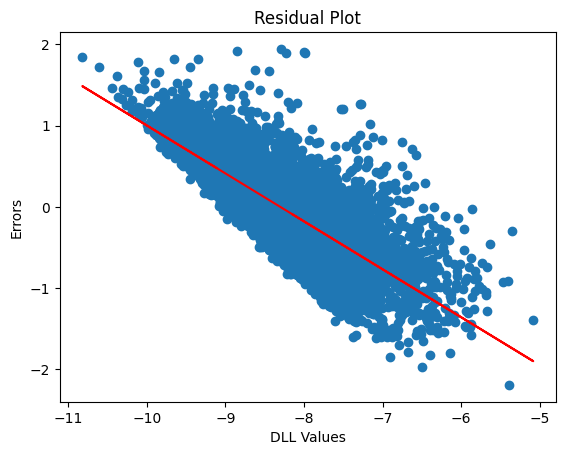

In [30]:
plt.scatter(x = y, y = errors)
plt.title("Residual Plot")
plt.xlabel("DLL Values")
plt.ylabel("Errors")
plt.plot(y, a*y+b, color="red")

In [31]:
errorDataGrouped = errorData.groupby("DLL Vals").mean()
errorDataGrouped

,Errors
DLL Vals,
-10.818644,1.840696
-10.611667,1.721454
-10.444333,1.466706
-10.374000,1.610616
-10.366667,1.354977
...,...
-5.463043,-0.932080
-5.399434,-0.909292
-5.397500,-2.193437


In [32]:
model2 = LinearRegression().fit(np.array(kp), y)

r_sqkp = model2.score(kp, y)
print(f"coefficient of determination: {r_sqkp}")

interceptkp = model2.intercept_
print(f"intercept: {interceptkp}")

coefficientskp = model2.coef_
print(f"coefficients: {coefficientskp}")

coefficient of determination: 0.2977019687257477
intercept: -8.90695982627546
coefficients: [0.02768954]


-0.7022980312742524 -5.831331255206197


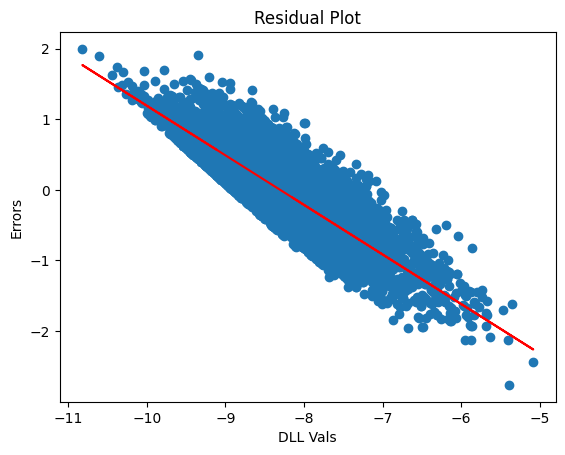

In [33]:
errorskp = model2.predict(kp) - y
a2, b2 = np.polyfit(y, errorskp, 1)
print(a2, b2)

plt.scatter(x = y, y = errorskp)
plt.title("Residual Plot")
plt.xlabel("DLL Vals")
plt.ylabel("Errors")
plt.plot(y, a2*y+b2, color="red")

In [34]:
model3 = LinearRegression().fit(np.array(IMF), y)

r_sqIMF = model3.score(IMF, y)
print(f"coefficient of determination: {r_sqIMF}")

interceptIMF = model3.intercept_
print(f"intercept: {interceptIMF}")

coefficientsIMF = model3.coef_
print(f"coefficients: {coefficientsIMF}")

coefficient of determination: 0.31790714540289133
intercept: -9.1536161223545
coefficients: [0.14740201]


-0.6820928545971089 -5.663563337559307


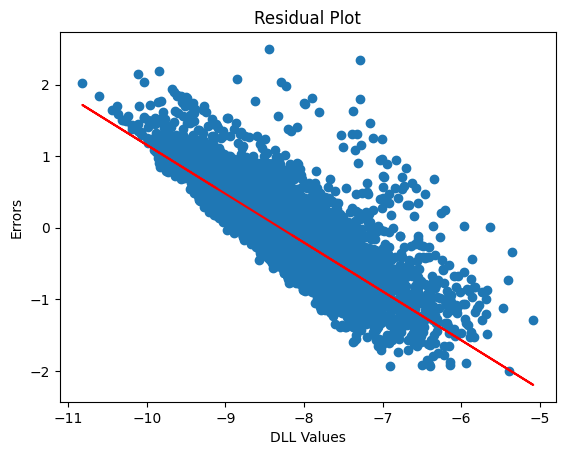

In [35]:
errorsIMF = model3.predict(IMF) - y
a3, b3 = np.polyfit(y, errorsIMF, 1)
print(a3, b3)

plt.scatter(x = y, y = errorsIMF)
plt.title("Residual Plot")
plt.xlabel("DLL Values")
plt.ylabel("Errors")
plt.plot(y, a3*y+b3, color="red")

In [36]:
nasa = open_and_split("1995 NASA Data.lst", 0)
nasa

deleted rows: ['1995', '1', '0', '4.0', '3.9', '-32.9', '100.8', '-0.6', '3.2', '-2.1', '3.6', '-1.2', '0.6', '1.2', '0.5', '0.9', '0.5', '15816.', '16.3', '315.', '-0.4', '4.6', '0.016', '2491.', '1.2', '1.', '0.5', '0.7', '0.002', '2.87', '0.38', '6.11', '15.9', '6.3', '0.0047', '10', '13', '-2', '4', '72.9', '32', '-6', '25', '0.3', '0.006201']
<class 'list'>


[['1995',
  '1',
  '0',
  '4.0',
  '3.9',
  '-32.9',
  '100.8',
  '-0.6',
  '3.2',
  '-2.1',
  '3.6',
  '-1.2',
  '0.6',
  '1.2',
  '0.5',
  '0.9',
  '0.5',
  '15816.',
  '16.3',
  '315.',
  '-0.4',
  '4.6',
  '0.016',
  '2491.',
  '1.2',
  '1.',
  '0.5',
  '0.7',
  '0.002',
  '2.87',
  '0.38',
  '6.11',
  '15.9',
  '6.3',
  '0.0047',
  '10',
  '13',
  '-2',
  '4',
  '72.9',
  '32',
  '-6',
  '25',
  '0.3',
  '0.006201'],
 ['1995',
  '1',
  '1',
  '3.0',
  '2.9',
  '-27.1',
  '110.7',
  '-0.9',
  '2.4',
  '-1.3',
  '2.6',
  '-0.7',
  '0.3',
  '0.8',
  '0.2',
  '0.3',
  '0.8',
  '15601.',
  '18.8',
  '315.',
  '-0.1',
  '3.1',
  '0.013',
  '2098.',
  '1.2',
  '1.',
  '0.2',
  '0.6',
  '0.001',
  '3.28',
  '0.22',
  '12.51',
  '22.8',
  '6.6',
  '0.0023',
  '10',
  '13',
  '3',
  '4',
  '72.9',
  '38',
  '-11',
  '26',
  '0.4',
  '0.006201'],
 ['1995',
  '1',
  '2',
  '3.2',
  '1.9',
  '-13.0',
  '75.1',
  '0.5',
  '1.8',
  '-0.4',
  '1.8',
  '0.0',
  '0.7',
  '2.6',
  '1.6',
  '0.9',
  

In [37]:
nasa_captions = ["YEAR", "DOY", "Hour", "Scalar B, nT", "Vector B Magnitude, nT", "Lat. Angle of B (GSE)", "Long. Angle of B (GSE)", "BX, nT (GSE, GSM)", "BY, nT (GSE)", "BZ, nT (GSE)", "BY, nT (GSM)", "BZ, nT (GSM)", "RMS_magnitude, nT", "RMS_field_vector, nT", "RMS_BX_GSE, nT", "RMS_BY_GSE, nT", "RMS_BZ_GSE, nT", "SW Plasma Temperature, K", "SW Proton Density, N/cm^3", "SW Plasma Speed, km/s", "SW Plasma flow long. angle", "SW Plasma flow lat. angle", "Alpha/Prot. ratio", "sigma-T,K", "sigma-n, N/cm^3)", "sigma-V, km/s", "sigma-phi V, degrees", "sigma-theta V, degrees", "sigma-ratio", "Flow pressure", "E elecrtric field", "Plasma Beta", "Alfen mach number", "Magnetosonic Much num.", "Quasy-Invariant", "Kp index", "R (Sunspot No.)", "Dst-index, nT", "ap_index, nT", "f10.7_index", "AE-index, nT", "AL-index, nT", "AU-index, nT", "pc-index", "Lyman_alpha"]

nasa_data = pd.DataFrame(nasa, columns=nasa_captions)
nasa_data

,YEAR,DOY,Hour,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,1995,1,0,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,1995,1,1,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,1995,1,2,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,1995,1,3,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,1995,1,4,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,1995,365,18,5.2,3.3,18.8,276.3,0.3,-3.1,1.0,...,20,0,-5,7,72.7,104,-44,59,0.6,0.006399
8755,1995,365,19,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,1995,365,20,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,1995,365,21,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399


In [38]:
nasa_1995 = nasa_data.drop(["YEAR"], axis=1)
nasa_1995

,DOY,Hour,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,1,0,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,3.6,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,1,1,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,2.6,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,1,2,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,1.8,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,1,3,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,2.4,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,1,4,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,2.1,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,365,18,5.2,3.3,18.8,276.3,0.3,-3.1,1.0,-3.2,...,20,0,-5,7,72.7,104,-44,59,0.6,0.006399
8755,365,19,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,-3.7,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,365,20,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,-4.6,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,365,21,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,-5.8,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399


In [39]:
time = [24 * int(nasa_1995["DOY"][i]) + int(nasa_1995["Hour"][i]) for i in range(len(nasa_1995))]
time

[24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 2

In [40]:
nasa_1995.insert(0, "Time", time)
nasa_1995

,Time,DOY,Hour,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,24,1,0,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,25,1,1,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,26,1,2,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,27,1,3,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,28,1,4,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8778,365,18,5.2,3.3,18.8,276.3,0.3,-3.1,1.0,...,20,0,-5,7,72.7,104,-44,59,0.6,0.006399
8755,8779,365,19,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,8780,365,20,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,8781,365,21,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399


In [41]:
nasa_time = nasa_1995.drop(["DOY", "Hour"], axis=1)
nasa_time

,Time,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,24,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,3.6,-1.2,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,25,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,2.6,-0.7,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,26,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,1.8,0.0,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,27,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,2.4,0.7,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,28,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,2.1,0.5,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8778,5.2,3.3,18.8,276.3,0.3,-3.1,1.0,-3.2,0.5,...,20,0,-5,7,72.7,104,-44,59,0.6,0.006399
8755,8779,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,-3.7,2.1,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,8780,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,-4.6,2.9,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,8781,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,-5.8,2.2,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399


In [42]:
ae = nasa_time[["Time", "AE-index, nT"]]
ae

,Time,"AE-index, nT"
0,24,32
1,25,38
2,26,34
3,27,36
4,28,31
...,...,...
8754,8778,104
8755,8779,248
8756,8780,90
8757,8781,34


In [43]:
ae["AE-index, nT"] = ae["AE-index, nT"].astype(int)
ae

/tmp/ipykernel_408/4264891676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ae["AE-index, nT"] = ae["AE-index, nT"].astype(int)


,Time,"AE-index, nT"
0,24,32
1,25,38
2,26,34
3,27,36
4,28,31
...,...,...
8754,8778,104
8755,8779,248
8756,8780,90
8757,8781,34


In [44]:
ae_grouped = ae.groupby("Time").mean()
ae_grouped

,"AE-index, nT"
Time,
24,32
25,38
26,34
27,36
28,31
...,...
8778,104
8779,248
8780,90


In [54]:
dataFrameAE = pd.merge(left=dataFrame, right=ae_grouped, left_on="Time", right_on="Time")
dataFrameAE = dataFrameAE.reset_index().drop(["index"], axis=1)
dataFrameAE

,Time,DLL,IMF E,kp,"AE-index, nT"
0,28,-9.117692,5.112000,0.0,31
1,30,-9.576429,3.749636,7.0,42
2,31,-8.836842,4.309483,7.0,35
3,32,-8.737458,5.032833,7.0,28
4,35,-7.578333,4.255000,13.0,152
...,...,...,...,...,...
7861,8778,-7.472881,5.203333,20.0,104
7862,8779,-7.786724,6.135333,20.0,248
7863,8780,-8.430000,7.226500,20.0,90
7864,8781,-8.360167,6.969333,10.0,34


In [55]:
x4 = []
y4 = []

for i in range(len(dataFrameAE)):
    x4.append([dataFrameAE["IMF E"][i], dataFrameAE["kp"][i], dataFrameAE["AE-index, nT"][i]])
    y4.append(dataFrameAE["DLL"][i])
    
x4, y4 = np.array(x4), np.array(y4)

x4,y4

(array([[ 5.112     ,  0.        , 31.        ],
        [ 3.74963636,  7.        , 42.        ],
        [ 4.30948276,  7.        , 35.        ],
        ...,
        [ 7.2265    , 20.        , 90.        ],
        [ 6.96933333, 10.        , 34.        ],
        [ 5.986     , 10.        , 34.        ]]),
 array([-9.11769231, -9.57642857, -8.83684211, ..., -8.43      ,
        -8.36016667, -8.14444444]))

In [56]:
model4 = LinearRegression().fit(x4, y4)


In [57]:
r_sq4 = model4.score(x4, y4)
print(f"coefficient of determination: {r_sq4}")

intercept4 = model4.intercept_
print(f"intercept: {intercept4}")

coefficients4 = model4.coef_
print(f"coefficients: {coefficients4}")

coefficient of determination: 0.40954037367347706
intercept: -9.269947356945131
coefficients: [1.01188487e-01 1.67388107e-02 8.77211492e-05]


In [58]:
errors4 = model4.predict(x4) - y4

a4, b4 = np.polyfit(y4, errors4, 1)
a4,b4

(-0.5904596263265228, -4.902712980254167)

In [59]:
errorData4 = pd.DataFrame({"DLL Vals": y4, "Errors": errors4})
errorData4

,DLL Vals,Errors
0,-9.117692,0.367740
1,-9.576429,0.806757
2,-8.836842,0.123207
3,-8.737458,0.096403
4,-7.578333,-1.030119
...,...,...
7861,-7.472881,-0.926649
7862,-7.786724,-0.505867
7863,-8.430000,0.233962
7864,-8.360167,-0.034194


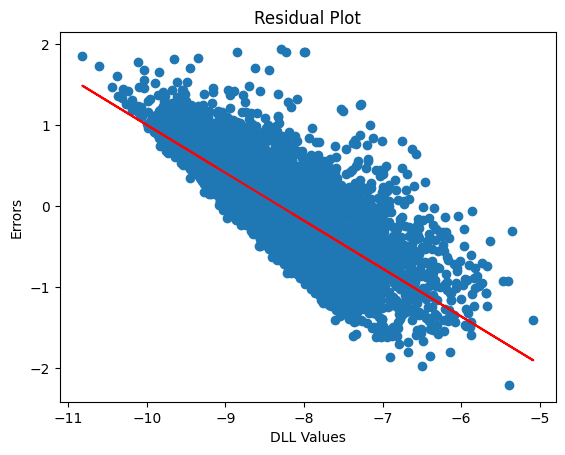

In [60]:
plt.scatter(x = y4, y = errors4)
plt.title("Residual Plot")
plt.xlabel("DLL Values")
plt.ylabel("Errors")
plt.plot(y4, a4*y4+b4, color="red")

In [61]:
def add_index(index, original):
    data = nasa_time[["Time", index]]
    data[index] = data[index].astype(float)
    data_grouped = data.groupby("Time").mean()

    dataFrame = pd.merge(left=original, right=data_grouped, left_on="Time", right_on="Time")
    dataFrame = dataFrame.reset_index().drop(["index"], axis=1)

    x = []
    y = []

    for i in range(len(dataFrame)):
        x.append([dataFrame["IMF E"][i], dataFrame["kp"][i], dataFrame["AE-index, nT"][i], dataFrame[index][i]])
        y.append(dataFrameAE["DLL"][i])
    
    x, y = np.array(x), np.array(y)

    model = LinearRegression().fit(x, y)

    r_sq = model.score(x, y)
    print(f"coefficient of determination: {r_sq}")

    intercept = model.intercept_
    print(f"intercept: {intercept}")

    coefficients = model.coef_
    print(f"coefficients: {coefficients}")

    errors = model.predict(x) - y

    a, b = np.polyfit(y, errors, 1)
    print(f"a: {a}, b: {b}")

    errorData = pd.DataFrame({"DLL Vals": y, "Errors": errors})

    plt.scatter(x = y, y = errors)
    plt.title("Residual Plot")
    plt.xlabel("DLL Values")
    plt.ylabel("Errors")
    plt.plot(y, a*y+b, color="red")

/tmp/ipykernel_408/1305324230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[index] = data[index].astype(float)
coefficient of determination: 0.4451800496955216
intercept: -9.33068902366987
coefficients: [0.08754097 0.0147226  0.00013875 0.06676832]
a: -0.5548199503044785, b: -4.606789102558415


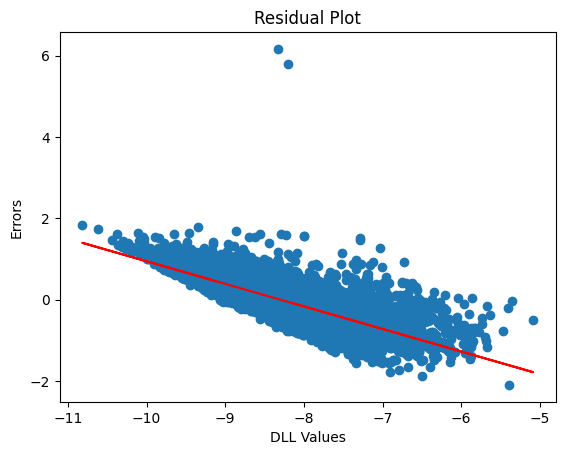

In [62]:
add_index("Flow pressure", dataFrameAE)

In [63]:
y

array([-9.11769231, -9.57642857, -8.83684211, ..., -8.43      ,
       -8.36016667, -8.14444444])

In [64]:
x4

array([[ 5.112     ,  0.        , 31.        ],
       [ 3.74963636,  7.        , 42.        ],
       [ 4.30948276,  7.        , 35.        ],
       ...,
       [ 7.2265    , 20.        , 90.        ],
       [ 6.96933333, 10.        , 34.        ],
       [ 5.986     , 10.        , 34.        ]])

In [65]:
nasa_time

,Time,"Scalar B, nT","Vector B Magnitude, nT",Lat. Angle of B (GSE),Long. Angle of B (GSE),"BX, nT (GSE, GSM)","BY, nT (GSE)","BZ, nT (GSE)","BY, nT (GSM)","BZ, nT (GSM)",...,Kp index,R (Sunspot No.),"Dst-index, nT","ap_index, nT",f10.7_index,"AE-index, nT","AL-index, nT","AU-index, nT",pc-index,Lyman_alpha
0,24,4.0,3.9,-32.9,100.8,-0.6,3.2,-2.1,3.6,-1.2,...,10,13,-2,4,72.9,32,-6,25,0.3,0.006201
1,25,3.0,2.9,-27.1,110.7,-0.9,2.4,-1.3,2.6,-0.7,...,10,13,3,4,72.9,38,-11,26,0.4,0.006201
2,26,3.2,1.9,-13.0,75.1,0.5,1.8,-0.4,1.8,0.0,...,10,13,6,4,72.9,34,-12,20,0.1,0.006201
3,27,4.3,4.0,4.4,142.1,-3.2,2.5,0.3,2.4,0.7,...,0,13,5,0,72.9,36,-11,24,-0.0,0.006201
4,28,4.8,4.8,3.9,154.3,-4.3,2.1,0.3,2.1,0.5,...,0,13,3,0,72.9,31,-10,19,-0.1,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8778,5.2,3.3,18.8,276.3,0.3,-3.1,1.0,-3.2,0.5,...,20,0,-5,7,72.7,104,-44,59,0.6,0.006399
8755,8779,6.0,5.7,29.1,319.9,3.8,-3.2,2.8,-3.7,2.1,...,20,0,-10,7,72.7,248,-196,51,0.6,0.006399
8756,8780,7.1,7.0,33.7,319.0,4.4,-3.8,3.9,-4.6,2.9,...,20,0,-11,7,72.7,90,-39,49,0.1,0.006399
8757,8781,7.0,6.9,31.6,301.0,3.0,-5.0,3.6,-5.8,2.2,...,10,0,-10,4,72.7,34,0,34,0.0,0.006399


In [66]:
FP = nasa_time[["Time", "Flow pressure"]]
FP["Flow pressure"] = FP["Flow pressure"].astype(float)
FP_grouped = FP.groupby("Time").mean()

dataFrame3 = pd.merge(left=dataFrameAE, right=FP_grouped, left_on="Time", right_on="Time")
dataFrame3 = dataFrame3.reset_index().drop(["index"], axis=1)

dataFrame3

/tmp/ipykernel_408/377947523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FP["Flow pressure"] = FP["Flow pressure"].astype(float)


,Time,DLL,IMF E,kp,"AE-index, nT",Flow pressure
0,28,-9.117692,5.112000,0.0,31,2.51
1,30,-9.576429,3.749636,7.0,42,3.20
2,31,-8.836842,4.309483,7.0,35,3.30
3,32,-8.737458,5.032833,7.0,28,2.99
4,35,-7.578333,4.255000,13.0,152,3.46
...,...,...,...,...,...,...
7861,8778,-7.472881,5.203333,20.0,104,2.75
7862,8779,-7.786724,6.135333,20.0,248,2.25
7863,8780,-8.430000,7.226500,20.0,90,1.79
7864,8781,-8.360167,6.969333,10.0,34,1.70


In [67]:
AP = nasa_time[["Time", "ap_index, nT"]]
AP["ap_index, nT"] = AP["ap_index, nT"].astype(float)
AP_grouped = AP.groupby("Time").mean()

dataFrame6 = pd.merge(left=dataFrame3, right=AP_grouped, left_on="Time", right_on="Time")
dataFrame6 = dataFrame6.reset_index().drop(["index"], axis=1)

dataFrame6

/tmp/ipykernel_408/1696796033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP["ap_index, nT"] = AP["ap_index, nT"].astype(float)


,Time,DLL,IMF E,kp,"AE-index, nT",Flow pressure,"ap_index, nT"
0,28,-9.117692,5.112000,0.0,31,2.51,0.0
1,30,-9.576429,3.749636,7.0,42,3.20,3.0
2,31,-8.836842,4.309483,7.0,35,3.30,3.0
3,32,-8.737458,5.032833,7.0,28,2.99,3.0
4,35,-7.578333,4.255000,13.0,152,3.46,5.0
...,...,...,...,...,...,...,...
7861,8778,-7.472881,5.203333,20.0,104,2.75,7.0
7862,8779,-7.786724,6.135333,20.0,248,2.25,7.0
7863,8780,-8.430000,7.226500,20.0,90,1.79,7.0
7864,8781,-8.360167,6.969333,10.0,34,1.70,4.0


In [68]:
x6 = []
y6 = []

for i in range(len(dataFrame6)):
    x6.append([dataFrame6["IMF E"][i], dataFrame6["kp"][i], dataFrame6["AE-index, nT"][i], dataFrame6["Flow pressure"][i], dataFrame6["ap_index, nT"][i]])
    y6.append(dataFrame6["DLL"][i])
    
x6, y6 = np.array(x6), np.array(y6)

x6,y6

(array([[ 5.112     ,  0.        , 31.        ,  2.51      ,  0.        ],
        [ 3.74963636,  7.        , 42.        ,  3.2       ,  3.        ],
        [ 4.30948276,  7.        , 35.        ,  3.3       ,  3.        ],
        ...,
        [ 7.2265    , 20.        , 90.        ,  1.79      ,  7.        ],
        [ 6.96933333, 10.        , 34.        ,  1.7       ,  4.        ],
        [ 5.986     , 10.        , 34.        ,  2.2       ,  4.        ]]),
 array([-9.11769231, -9.57642857, -8.83684211, ..., -8.43      ,
        -8.36016667, -8.14444444]))

coefficient of determination: 0.44739109991778536
intercept: -9.376698140225571
coefficients: [ 0.09000734  0.01863533  0.00018005  0.06742562 -0.00499719]
a: -0.5526089000822144, b: -4.5884302781081665


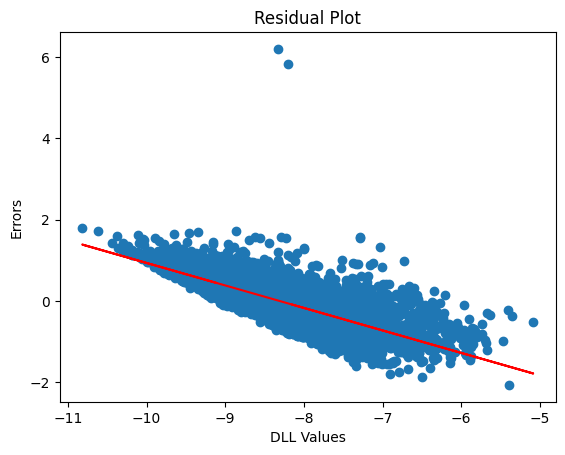

In [69]:
model6 = LinearRegression().fit(x6, y6)

r_sq6 = model6.score(x6, y6)
print(f"coefficient of determination: {r_sq6}")

intercept6 = model6.intercept_
print(f"intercept: {intercept6}")

coefficients6 = model6.coef_
print(f"coefficients: {coefficients6}")

errors6 = model6.predict(x6) - y6

a6, b6 = np.polyfit(y6, errors6, 1)
print(f"a: {a6}, b: {b6}")

errorData6 = pd.DataFrame({"DLL Vals": y6, "Errors": errors6})

plt.scatter(x = y6, y = errors6)
plt.title("Residual Plot")
plt.xlabel("DLL Values")
plt.ylabel("Errors")
plt.plot(y6, a6*y6+b6, color="red")

In [71]:
pc = nasa_time[["Time", "pc-index"]]
pc["pc-index"] = pc["pc-index"].astype(float)
pc_grouped = pc.groupby("Time").mean()

dataFrame7 = pd.merge(left=dataFrame6, right=pc_grouped, left_on="Time", right_on="Time")
dataFrame7 = dataFrame7.reset_index().drop(["index"], axis=1)

dataFrame7

/tmp/ipykernel_408/2679864026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pc["pc-index"] = pc["pc-index"].astype(float)


,Time,DLL,IMF E,kp,"AE-index, nT",Flow pressure,"ap_index, nT",pc-index
0,28,-9.117692,5.112000,0.0,31,2.51,0.0,-0.1
1,30,-9.576429,3.749636,7.0,42,3.20,3.0,-0.2
2,31,-8.836842,4.309483,7.0,35,3.30,3.0,0.0
3,32,-8.737458,5.032833,7.0,28,2.99,3.0,0.0
4,35,-7.578333,4.255000,13.0,152,3.46,5.0,0.7
...,...,...,...,...,...,...,...,...
7861,8778,-7.472881,5.203333,20.0,104,2.75,7.0,0.6
7862,8779,-7.786724,6.135333,20.0,248,2.25,7.0,0.6
7863,8780,-8.430000,7.226500,20.0,90,1.79,7.0,0.1
7864,8781,-8.360167,6.969333,10.0,34,1.70,4.0,0.0


In [73]:
x7 = []
y7 = []

for i in range(len(dataFrame7)):
    x7.append([dataFrame7["IMF E"][i], dataFrame7["kp"][i], dataFrame7["AE-index, nT"][i], dataFrame7["Flow pressure"][i], dataFrame7["ap_index, nT"][i], dataFrame7["pc-index"][i]])
    y7.append(dataFrame7["DLL"][i])
    
x7, y7 = np.array(x7), np.array(y7)

x7,y7

(array([[ 5.112     ,  0.        , 31.        ,  2.51      ,  0.        ,
         -0.1       ],
        [ 3.74963636,  7.        , 42.        ,  3.2       ,  3.        ,
         -0.2       ],
        [ 4.30948276,  7.        , 35.        ,  3.3       ,  3.        ,
          0.        ],
        ...,
        [ 7.2265    , 20.        , 90.        ,  1.79      ,  7.        ,
          0.1       ],
        [ 6.96933333, 10.        , 34.        ,  1.7       ,  4.        ,
          0.        ],
        [ 5.986     , 10.        , 34.        ,  2.2       ,  4.        ,
          0.        ]]),
 array([-9.11769231, -9.57642857, -8.83684211, ..., -8.43      ,
        -8.36016667, -8.14444444]))

coefficient of determination: 0.4473943077213217
intercept: -9.376755450127986
coefficients: [ 0.0899948   0.01865805  0.00019117  0.06740868 -0.00498627 -0.0023456 ]
a: -0.5526056922786778, b: -4.5884036430270605


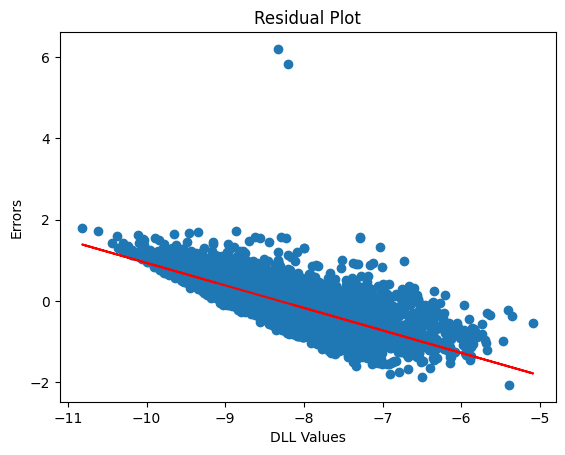

In [74]:
model7 = LinearRegression().fit(x7, y7)

r_sq7 = model7.score(x7, y7)
print(f"coefficient of determination: {r_sq7}")

intercept7 = model7.intercept_
print(f"intercept: {intercept7}")

coefficients7 = model7.coef_
print(f"coefficients: {coefficients7}")

errors7 = model7.predict(x7) - y7

a7, b7 = np.polyfit(y7, errors7, 1)
print(f"a: {a7}, b: {b7}")

errorData7 = pd.DataFrame({"DLL Vals": y7, "Errors": errors7})

plt.scatter(x = y7, y = errors7)
plt.title("Residual Plot")
plt.xlabel("DLL Values")
plt.ylabel("Errors")
plt.plot(y7, a7*y7+b7, color="red")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28a83fbe-9ed8-4ad0-ab71-9db262ace005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>